In [3]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.cluster.hierarchy import dendrogram

In [4]:
orders = pd.read_csv('../data/orders.csv')

c:\users\askib\pycharmprojects\ssytemy-rekomendacyjne-1\venv_new\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135303 entries, 0 to 135302
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135233 non-null  float64
 1   customer_id                     135303 non-null  object 
 2   item_count                      128378 non-null  float64
 3   grand_total                     135303 non-null  float64
 4   payment_mode                    135303 non-null  int64  
 5   promo_code                      4305 non-null    object 
 6   vendor_discount_amount          135303 non-null  float64
 7   promo_code_discount_percentage  65880 non-null   float64
 8   is_favorite                     100108 non-null  object 
 9   is_rated                        135303 non-null  object 
 10  vendor_rating                   45220 non-null   float64
 11  driver_rating                   135303 non-null  float64
 12  deliverydistance

In [8]:
orders['vendor_id'].unique()

array([105, 294,  83,  90,  78, 154, 193,   4, 288,  85, 195, 161, 196,
        75,  20, 221, 300,  81, 180, 231, 303, 225, 110, 176,  33,  23,
       115, 113,  13, 157, 159, 289, 106, 134,  76, 104, 310,  55, 201,
       274, 265, 304, 259, 160,  28, 250, 191, 189,  92, 192, 271, 299,
       203, 298, 207,  43, 197, 243, 148,  66, 145, 199,  84,  82, 149,
       188,  44,  79, 237, 356, 419, 391,  67,  86, 537, 459, 386, 295,
       401, 398, 216, 573, 575, 577, 578, 582, 583, 547, 679, 676, 681,
       841, 846, 858, 849, 845, 843, 856, 855, 907], dtype=int64)

In [15]:
aggregated = orders[['customer_id', 'vendor_id']].groupby(['customer_id', 'vendor_id']).size().reset_index()
aggregated.columns = ['customer_id', 'vendor_id', 'count']
aggregated

,customer_id,vendor_id,count
0,000THBA,148,1
1,002510Y,157,1
2,005ECL6,237,2
3,0075AM7,145,1
4,009UFS1,83,1
...,...,...,...
71479,ZZY3N0D,356,1
71480,ZZY3N0D,419,1
71481,ZZY3N0D,459,1
71482,ZZY3N0D,537,1


In [27]:
x = aggregated.groupby('customer_id').size().to_frame()
x.columns = ['vendor_count']
x

,vendor_count
customer_id,
000THBA,1
002510Y,1
005ECL6,1
0075AM7,1
009UFS1,4
...,...
ZZVGIVK,2
ZZVLIB5,4
ZZWKMGG,1


array([[<AxesSubplot:title={'center':'vendor_count'}>]], dtype=object)

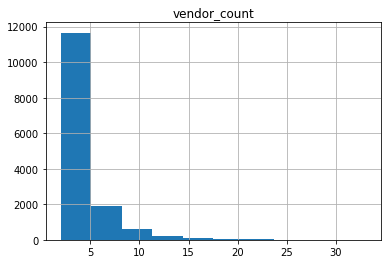

In [29]:
x.loc[x['vendor_count'] >1].hist()

In [37]:
user_ids_to_test = x.loc[(x['vendor_count'] > 10) & (x['vendor_count'] <  15) ].index.to_list()

In [40]:
test_user_orders = aggregated.loc[aggregated['customer_id'].isin(user_ids_to_test[:10])]

08F2YRP
0B3QNQ5
0F3YWPW
0KZXA52
0ORMDCX
0TJ0XYT
0UW9NTR
0WID5QE
11QEV67
13HY3SZ


In [44]:

aggregated.loc[aggregated['customer_id'] == '08F2YRP']['vendor_id'].to_list()

[33, 67, 110, 113, 134, 176, 195, 259, 298, 303, 310]

In [52]:

test_user_orders.to_csv('test_user_orders.csv')